In [3]:
# 경고 메시지가 안나오게..
import warnings
warnings.filterwarnings('ignore')

# 기본
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 교차 검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 학습 데이터와 검증데이터로 나누는 함수
from sklearn.model_selection import train_test_split

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 딥러닝
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

# 다중분류를 위한 핫-윈 인코더
from keras.utils import to_categorical

# 저장된 딥러닝 모델을 복구하는 함수
from keras.models import load_model

# epoch마다 모델을 저장하는 함수
from keras.callbacks import ModelCheckpoint

# 더이상 성능 향상이 이루어지지 않는다면 조기 중단시킬 수 있는 함수
from keras.callbacks import EarlyStopping

# 문장을 잘라준다.
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import text_to_word_sequence

# 저장
import pickle

# 시간 모듈
import time

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# gpu 사용 초기화 및 할당
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [4]:
# imdb 데이터 사용
from keras.datasets import imdb

In [5]:
# seed값 설정
np.random.seed(3)
tf.random.set_seed(3)

In [6]:
# 데이터를 가져온다.
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=5000)

17465344/17464789 [==============================] - 1s 0us/step


In [7]:
# 입력 데이터 전처리
# 각 문장의 단어수를 통일한다. 부족한 부분은 0으로 채운다.

X_train = pad_sequences(X_train)
X_test = pad_sequences(X_test)

In [8]:
# 모델 설정
model = Sequential()

# 5000개의 단어를 100개로 변환하는 은닉층
model.add(Embedding(5000, 100))

# 노드 on/off
model.add(Dropout(0.5))

# CNN - 문장이기 때문에 1차원
# 5개 짜리 커널을 64개 생성

model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1 ))

# 데이터 압축
model.add(MaxPooling1D(pool_size=4))

# RNN
model.add(LSTM(55))

# 출력층 셋팅
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [9]:
# 구성된 신경망 정보
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         500000    
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 55)                26400     
_________________________________________________________________
dense (Dense)                (None, 1)                 56        
_________________________________________________________________
activation (Activation)      (None, 1)                 0

In [10]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# 모델 설정
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=100, epochs=5)

Epoch 1/5
250/250 [==============================] - 93s 350ms/step - loss: 0.5422 - accuracy: 0.6868 - val_loss: 0.3075 - val_accuracy: 0.8696
Epoch 2/5
250/250 [==============================] - 87s 350ms/step - loss: 0.2451 - accuracy: 0.9060 - val_loss: 0.3024 - val_accuracy: 0.8710
Epoch 3/5
250/250 [==============================] - 87s 349ms/step - loss: 0.1996 - accuracy: 0.9230 - val_loss: 0.2893 - val_accuracy: 0.8804
Epoch 4/5
250/250 [==============================] - 36s 144ms/step - loss: 0.1635 - accuracy: 0.9383 - val_loss: 0.2987 - val_accuracy: 0.8801
Epoch 5/5
250/250 [==============================] - 34s 137ms/step - loss: 0.1498 - accuracy: 0.9464 - val_loss: 0.3172 - val_accuracy: 0.8762


In [12]:
# 검증용 데이터를 통해 확인을 한다
model.evaluate(X_test, Y_test)[1]

782/782 [==============================] - 14s 17ms/step - loss: 0.3172 - accuracy: 0.8762


0.8761600255966187

In [13]:
# 테스트 데이터의 오차 정보
y_vloss = history.history['val_loss']

# 학습셋의 오차 정보
y_loss = history.history['loss']

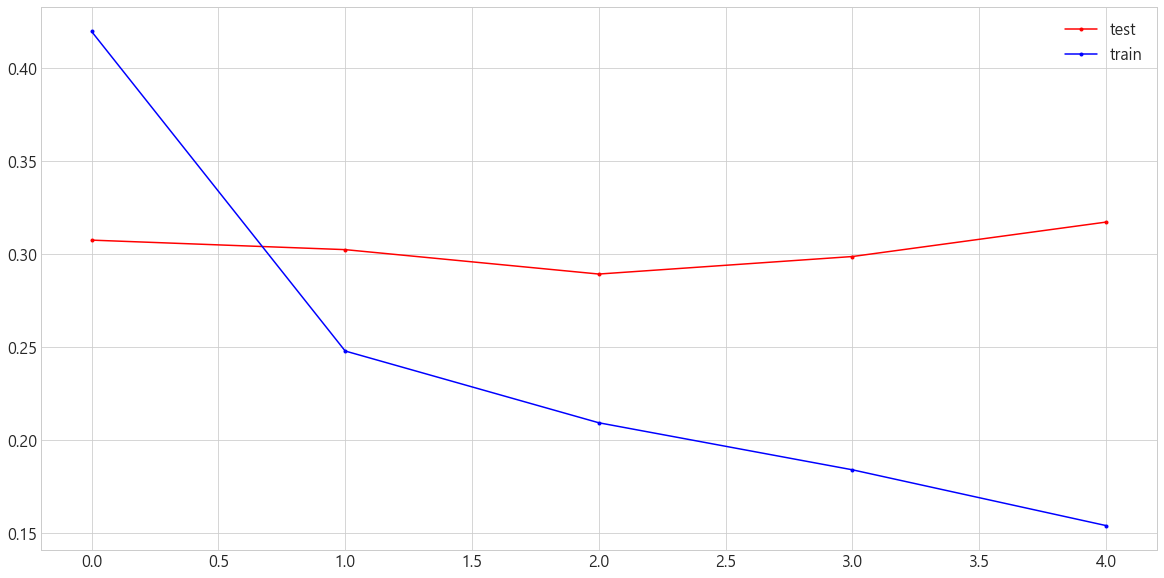

In [14]:
# 그래프
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='test')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train')

plt.legend()
plt.show()

=> 과적합의 가능성 있음